In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.functions import emission_profile_function
from metrics.metrics import co2_ipcc_pulse_absolute_metrics, absolute_metrics, relative_metrics
from climate_models.co2_ipcc_climate_model import co2_ipcc_climate_model
from climate_models.gwpstar_climate_model import species_gwpstar_climate_model
from climate_models.lwe_climate_model import species_lwe_climate_model
from climate_models.fair_climate_model import background_species_quantities_function, species_fair_climate_model

## Parameters

In [2]:
climate_model = "FaIR" # "GWP*", "LWE, "FaIR"
co2_method = "FaIR" # IPCC or FaIR

if climate_model == "FaIR":
    start_year = 1765
else:
    start_year = 2000
t0 = 2020
time_horizon = 100
end_year = t0 + time_horizon

if climate_model == "FaIR" or co2_method == "FaIR":
    background_species_quantities = background_species_quantities_function(start_year, end_year, rcp='RCP45')
if climate_model == "GWP*" or climate_model == "LWE":
    tcre = 0.00045

settings = "Lee" # "Lee", "Bickel"

In [3]:
species = "Aviation contrails"

In [4]:
sensitivity_rf_co2 = 9.2e-16 # Not used with FaIR
ratio_erf_rf_co2 = 1
efficacy_erf_co2 = 1
unit_value_co2 = 1*10**10

In [5]:
if species == "Aviation CO2":
    unit_value = 1*10**10
    sensitivity_rf = 9.2e-16 # Not used with FaIR
    ratio_erf_rf = 1
    efficacy_rf = 1
    efficacy_erf = 1
elif species == "Aviation contrails":
    unit_value = 1*10**10
    sensitivity_rf = 2.23e-12
    if settings == "Lee":
        ratio_erf_rf = 0.42
        efficacy_erf = 1
    elif settings == "Bickel":
        ratio_erf_rf = 0.55
        efficacy_erf = 0.38
elif species == "Aviation NOx - ST O3 increase":
    unit_value = 1*10**10
    sensitivity_rf = 25.1e-12 * (14/46)
    ratio_erf_rf = 1.37
    efficacy_erf = 1
elif species == "Aviation NOx - CH4 decrease and induced":
    unit_value = 1*10**10
    sensitivity_rf = -0.83e-9
    ratio_erf_rf = 1.18
    efficacy_erf = 1
elif species == "Aviation H2O":
    unit_value = 1*10**12
    sensitivity_rf = 0.0052e-12
    ratio_erf_rf = 1
    efficacy_erf = 1
elif species == "Aviation soot":
    unit_value = 1*10**14
    sensitivity_rf = 100.7e-12 # Not used
    ratio_erf_rf = 1
    efficacy_erf = 1
elif species == "Aviation sulfur":
    unit_value = 1*10**10
    sensitivity_rf = -19.9e-12 # Not used
    ratio_erf_rf = 1
    efficacy_erf = 1

## Metrics calculation

In [6]:
# Emission profiles
emission_profile_co2 = emission_profile_function(start_year,t0,time_horizon, 'pulse', unit_value_co2)
emission_profile = emission_profile_function(start_year,t0,time_horizon, 'pulse', unit_value)

In [7]:
# CO2 climate impact
if co2_method == 'IPCC':
    radiative_forcing_co2, effective_radiative_forcing_co2, temperature_co2 = co2_ipcc_climate_model(start_year, end_year, unit_value_co2)
    radiative_forcing_co2_unit, effective_radiative_forcing_co2_unit, temperature_co2_unit = radiative_forcing_co2/unit_value_co2, effective_radiative_forcing_co2/unit_value_co2, temperature_co2/unit_value_co2
    agwp_rf_co2, agwp_erf_co2, aegwp_rf_co2, aegwp_erf_co2, agtp_co2, iagtp_co2, atr_co2 = co2_ipcc_pulse_absolute_metrics(time_horizon)
elif co2_method == 'FaIR':
    species_settings_co2 = {"sensitivity_rf": sensitivity_rf_co2, "ratio_erf_rf": ratio_erf_rf_co2, "efficacy_erf": efficacy_erf_co2}
    model_settings_co2 = {"background_species_quantities": background_species_quantities}
    radiative_forcing_co2, effective_radiative_forcing_co2, temperature_co2 = species_fair_climate_model(start_year, end_year, "Aviation CO2", emission_profile_co2, species_settings_co2, model_settings_co2)
    radiative_forcing_co2_unit, effective_radiative_forcing_co2_unit, temperature_co2_unit = radiative_forcing_co2/unit_value_co2, effective_radiative_forcing_co2/unit_value_co2, temperature_co2/unit_value_co2
    agwp_rf_co2, agwp_erf_co2, aegwp_rf_co2, aegwp_erf_co2, agtp_co2, iagtp_co2, atr_co2 = absolute_metrics(radiative_forcing_co2_unit, effective_radiative_forcing_co2_unit, efficacy_erf_co2, temperature_co2_unit, time_horizon)

In [8]:
# Aviation species climate impact
if climate_model == "GWP*":
    species_settings = {"sensitivity_rf": sensitivity_rf, "ratio_erf_rf": ratio_erf_rf, "efficacy_erf": efficacy_erf}
    model_settings = {"tcre": tcre}
    radiative_forcing, effective_radiative_forcing, temperature = species_gwpstar_climate_model(start_year, end_year, species, emission_profile, species_settings, model_settings)
elif climate_model == "LWE":
    species_settings = {"sensitivity_rf": sensitivity_rf, "ratio_erf_rf": ratio_erf_rf, "efficacy_erf": efficacy_erf}
    model_settings = {"tcre": tcre}
    radiative_forcing, effective_radiative_forcing, temperature = species_lwe_climate_model(start_year, end_year, species, emission_profile, species_settings, model_settings)
elif climate_model == "FaIR":
    species_settings = {"sensitivity_rf": sensitivity_rf, "ratio_erf_rf": ratio_erf_rf, "efficacy_erf": efficacy_erf}
    model_settings = {"background_species_quantities": background_species_quantities}
    radiative_forcing, effective_radiative_forcing, temperature = species_fair_climate_model(start_year, end_year, species, emission_profile, species_settings, model_settings)
radiative_forcing_unit, effective_radiative_forcing_unit, temperature_unit = radiative_forcing/unit_value, effective_radiative_forcing/unit_value, temperature/unit_value
agwp_rf, agwp_erf, aegwp_rf, aegwp_erf, agtp, iagtp, atr = absolute_metrics(radiative_forcing_unit, effective_radiative_forcing_unit, efficacy_erf, temperature_unit, time_horizon)

In [9]:
# Relative metrics
gwp_rf, gwp_erf, egwp_rf, egwp_erf, gtp, igtp, ratr = relative_metrics(agwp_rf_co2, agwp_erf_co2, aegwp_rf_co2, aegwp_erf_co2, agtp_co2, iagtp_co2, atr_co2, agwp_rf, agwp_erf, aegwp_rf, aegwp_erf, agtp, iagtp, atr)
index_noms = ["GWP_RF", "GWP_ERF", "E-GWP_RF", "E-GWP_ERF", "GTP", "iGTP", "r-ATR"]
df = pd.DataFrame([gwp_rf, gwp_erf, egwp_rf, egwp_erf, gtp, igtp, ratr], columns=["Value"], index=index_noms)
df

,Value
GWP_RF,25.465060
GWP_ERF,10.695325
E-GWP_RF,10.695325
E-GWP_ERF,10.695325
GTP,1.638873
iGTP,12.085377
r-ATR,12.085377


## Plots

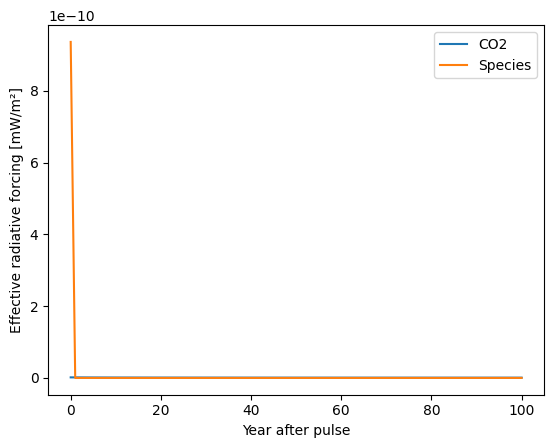

In [10]:
plt.plot(1000*effective_radiative_forcing_co2_unit[t0-start_year:end_year], label='CO2')
plt.plot(1000*effective_radiative_forcing_unit[t0-start_year:end_year], label='Species')
plt.xlabel('Year after pulse')
plt.ylabel('Effective radiative forcing [mW/m²]')
plt.legend()

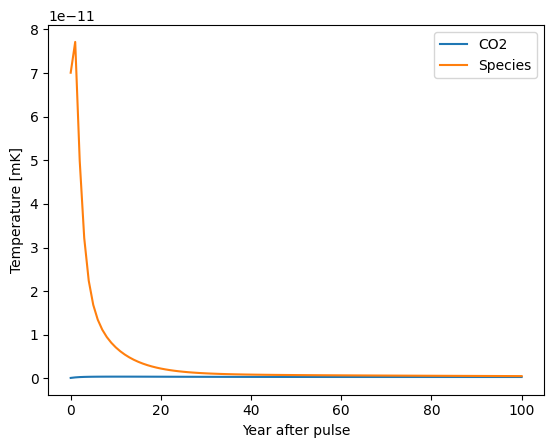

In [11]:
plt.plot(1000*temperature_co2_unit[t0-start_year:end_year], label='CO2')
plt.plot(1000*temperature_unit[t0-start_year:end_year], label='Species')
plt.xlabel('Year after pulse')
plt.ylabel('Temperature [mK]')
plt.legend()